<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/20_1_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RNN은 순서가 있는 데이터셋에 활용가능합니다. 

https://www.oreilly.com/library/view/neural-networks-and/9781492037354/ch04.html

Tensorflow에서는 simpleRNN, LSTM, GRU를 손쉽게 구현할수 있습니다

https://www.tensorflow.org/guide/keras/rnn


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np

x = np.linspace(0, 100, 1000) # Start, End, N
y = np.sin(x)

In [3]:
y

array([ 0.00000000e+00,  9.99330162e-02,  1.98865536e-01,  2.95807081e-01,
        3.89787104e-01,  4.79864709e-01,  5.65138069e-01,  6.44753455e-01,
        7.17913784e-01,  7.83886601e-01,  8.42011406e-01,  8.91706275e-01,
        9.32473678e-01,  9.63905466e-01,  9.85686954e-01,  9.97600074e-01,
        9.99525555e-01,  9.91444120e-01,  9.73436677e-01,  9.45683512e-01,
        9.08462478e-01,  8.62146222e-01,  8.07198446e-01,  7.44169268e-01,
        6.73689717e-01,  5.96465408e-01,  5.13269488e-01,  4.24934884e-01,
        3.32345974e-01,  2.36429728e-01,  1.38146426e-01,  3.84800478e-02,
       -6.15715795e-02, -1.61006773e-01, -2.58830020e-01, -3.54061947e-01,
       -4.45749125e-01, -5.32973611e-01, -6.14862143e-01, -6.90594881e-01,
       -7.59413613e-01, -8.20629350e-01, -8.73629220e-01, -9.17882606e-01,
       -9.52946458e-01, -9.78469728e-01, -9.94196886e-01, -9.99970476e-01,
       -9.95732696e-01, -9.81525973e-01, -9.57492539e-01, -9.23873010e-01,
       -8.81003973e-01, -

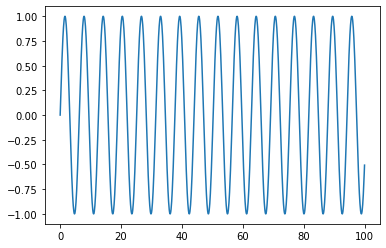

In [4]:
import matplotlib.pyplot as plt

plt.plot(x,y)

In [5]:
TEST_SIZE = 300

train = y[:-TEST_SIZE]
test = y[-TEST_SIZE:]

In [6]:
window_size = 20

inputs = []
targets = []

for i in range(len(train) - window_size):
    inputs.append(np.array(train[i:i+window_size]))
    targets.append(np.array(train[i+window_size]))

In [7]:
inputs[0]

array([0.        , 0.09993302, 0.19886554, 0.29580708, 0.3897871 ,
       0.47986471, 0.56513807, 0.64475345, 0.71791378, 0.7838866 ,
       0.84201141, 0.89170627, 0.93247368, 0.96390547, 0.98568695,
       0.99760007, 0.99952556, 0.99144412, 0.97343668, 0.94568351])

In [8]:
targets[0]

array(0.90846248)

In [9]:
inputs = np.array(inputs)
targets = np.array(targets)

In [10]:
print(inputs.shape)
print(targets.shape)

(680, 20)
(680,)


In [11]:
window_size = 20

test_inputs = []
test_targets = []

for i in range(len(test) - window_size):
    test_inputs.append(np.array(test[i:i+window_size]))
    test_targets.append(np.array(test[i+window_size]))
    
test_inputs=np.array(test_inputs)
test_targets = np.array(test_targets)

In [12]:
test_inputs = np.expand_dims(test_inputs,2)

In [13]:
test_inputs.shape

(280, 20, 1)

In [14]:
inputs = np.expand_dims(inputs,2)
targets = np.expand_dims(targets,1)
test_targets = np.expand_dims(test_targets,1)

In [15]:
test_targets.shape

(280, 1)

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.SimpleRNN(10, 
               input_shape=(20,1), 
               activation='relu', 
               return_sequences=False)
          )
model.add(layers.Dense(1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(inputs, targets, 
                                    epochs=30, 
                                    batch_size=16,
                                    validation_data=(test_inputs, test_targets))

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
41/43 [===========================>..] - ETA: 0s - loss: 0.2563WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000020D6BBF8708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full

In [19]:
pred = model.predict(test_inputs)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


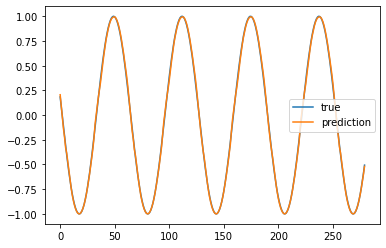

In [20]:
plt.plot(test_targets, label = 'true')
plt.plot(pred, label = 'prediction')
plt.legend()

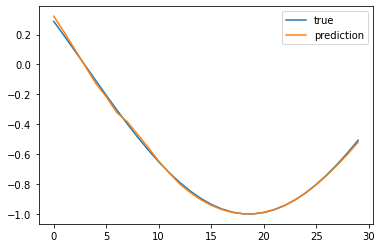

In [21]:
plt.plot(test_targets[-30:], label = 'true')
plt.plot(pred[-30:], label = 'prediction')
plt.legend()